In [37]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

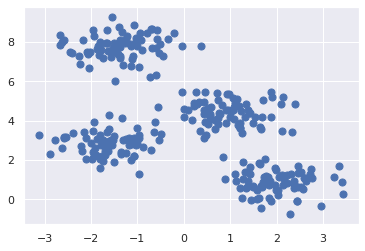

In [38]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [83]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='random')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

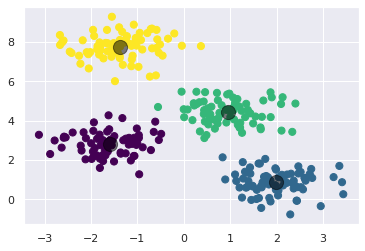

In [84]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [41]:
# Initialize yourself

In [108]:
class KMeans:
    def __init__(self, k, method='random', max_iter=300):
        self.k = k 
        self.method = method
        self.max_iter = max_iter
        pass
    
    def init_centers(self, X):
        if self.method == 'random':
            return X[np.random.choice(len(X), self.k, replace=False)] # find a small mistake here
        if self.method == 'k-means++':
            centroids = X[np.random.choice(len(X), 1)]
            while len(centroids)<self.k:
                min_distances = []
                for x in X:
                    distances = [np.linalg.norm(x-centroid)**2 for centroid in centroids]
                    min_distances.append(min(distances))
                probas = np.array(min_distances)/sum(min_distances)
                new_centroid = X[np.random.choice(len(X), 1, p=probas)]  
                centroids = np.append(centroids, new_centroid, axis=0)
            return centroids
    
    def fit(self, X):
        self.centroids = self.init_centers(X)
        for _ in range(self.max_iter):
            clusters = self.expectation(X, self.centroids)
            new_centroids = self.maximization(X, clusters)
            if (new_centroids == self.centroids).all():
                break
            self.centroids = new_centroids
            
    def expectation(self, X, centroids):
        clusters = []
        for x in X:
            distances = [np.linalg.norm(x-centroid) for centroid in centroids]
            clusters.append(np.argmin(distances))
        return np.array(clusters)
        
    def maximization(self, X, clusters):
        new_centers = []
        for k in range(self.k):
            new_centers.append(np.mean(X[clusters==k], axis=0))
        return np.array(new_centers)    
        
    def predict(self, X):
        return self.expectation(X, self.centroids)

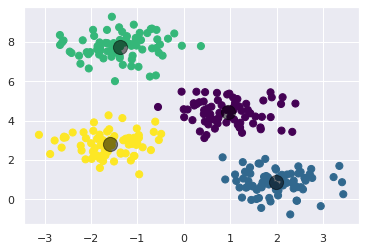

In [133]:
kmeans = KMeans(k=4, method='k-means++')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);